# Cerebral Carcinoma Detection Using Magnetic Resonance Imaging with Deep Learning Techniques



---



---





## Importing Modules

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

## Preparing Dataset

In [2]:
height_ = 100
width_ = 100

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
train = ImageDataGenerator(rescale=1/255, rotation_range = 0.2, brightness_range = (0.1,0.3))
test = ImageDataGenerator(rescale=1/255, rotation_range = 0.2, brightness_range = (0.1,0.3))

In [5]:
# cd drive/MyDrive

In [4]:
train_dataset = train.flow_from_directory("Train/",
                                          target_size=(width_, height_), 
                                            # color_mode='grayscale',
                                            batch_size=8,
                                            class_mode='binary')
                                         
val_dataset = test.flow_from_directory("Test/",
                                          target_size=(width_, height_),
                                            # color_mode='grayscale',
                                            batch_size=8,
                                            class_mode='binary')

Found 665 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'Normal': 0, 'Parkinson': 1}

## Preparing Model

In [8]:
with tf.device('/device:GPU:0'):
    SIZE_OF_IP = (width_, height_, 3) 
    model = keras.Sequential()

    # Convolutional layer and maxpool layer 1
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=SIZE_OF_IP))
    model.add(keras.layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 2
    model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))

    # Convolutional layer and maxpool layer 3
    model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Dropout(0.2))


    # # Convolutional layer and maxpool layer 4
    # model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
    # model.add(keras.layers.MaxPool2D(2,2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512,activation='relu'))

   # Op layer
    model.add(keras.layers.Dense(1,activation='sigmoid'))

## Training

In [10]:
with tf.device('/device:GPU:0'):
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(train_dataset,epochs = 10,validation_data = val_dataset)

Epoch 1/10
84/84 [==============================] - 16s 185ms/step - loss: 0.0771 - accuracy: 0.9910 - val_loss: 2.9362 - val_accuracy: 0.6205
Epoch 2/10
84/84 [==============================] - 15s 183ms/step - loss: 0.1958 - accuracy: 0.9925 - val_loss: 2.9745 - val_accuracy: 0.6205
Epoch 3/10
84/84 [==============================] - 15s 183ms/step - loss: 0.0594 - accuracy: 0.9970 - val_loss: 2.0839 - val_accuracy: 0.7289
Epoch 4/10
84/84 [==============================] - 16s 186ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 3.1411 - val_accuracy: 0.7289
Epoch 5/10
84/84 [==============================] - 16s 192ms/step - loss: 0.0379 - accuracy: 0.9910 - val_loss: 3.2682 - val_accuracy: 0.5602
Epoch 6/10
84/84 [==============================] - 15s 182ms/step - loss: 0.0501 - accuracy: 0.9955 - val_loss: 2.0627 - val_accuracy: 0.7108
Epoch 7/10
84/84 [==============================] - 15s 180ms/step - loss: 0.0427 - accuracy: 0.9985 - val_loss: 3.2259 - val_accuracy: 0.6325

<Figure size 432x288 with 0 Axes>

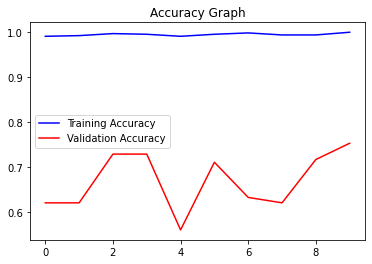

<Figure size 432x288 with 0 Axes>

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()


## Saving Model

In [12]:
model.save("park_grayscale_drop.h5")

## Loading Model

In [13]:
from keras import models

savedModel = models.load_model('park_grayscale_drop.h5')
savedModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 128)      

## Inferencing

In [14]:
from PIL import Image, ImageOps

In [32]:
def make_list_of_imgs(path):
    imgs = []
    valid_images = [".png"]
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        imgs.append(path + f)
    return imgs

In [43]:
def tumor_prediction(*argv): 
    count_p = 0
    count_n = 0
    for arg in argv: 
        for filename in arg:
            # image_read = cv2.imread(filename)
            print(filename)
            im = Image.open(filename)
            im2 = im.convert('RGB')
            im2 = im2.resize((height_, width_))
            # print(im1.shape)
            # image_read = cv2.resize(image_read, (height_, width_))
            image = np.array(im2) 
            # image = np.reshape(image, [100, 100, 3])
            plt.show()
            plt.imshow(image)
           
            X = np.expand_dims(image,axis=0)
            result = savedModel.predict(X)
#             print(val)
            if result == 1:
                plt.xlabel("Parkinsons",fontsize=15)
                count_p += 1


            elif result == 0:
                plt.xlabel("Normal",fontsize=15)
                count_n += 1
#         print("Normal: ", count_n)
#         print("Parkinsons: ", count_p)
    return count_p, count_n

### Testing on MRI images with cerebral Carcinoma

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_006.png
Test/Normal/Mag_Images_007.png


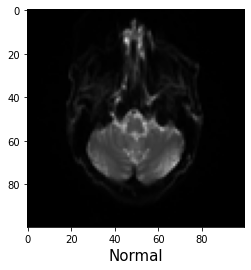

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_030.png


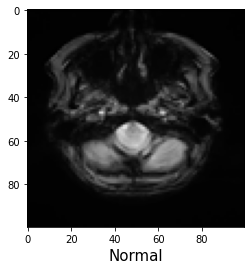

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_046.png


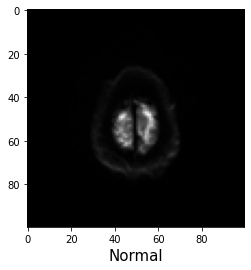

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_043.png


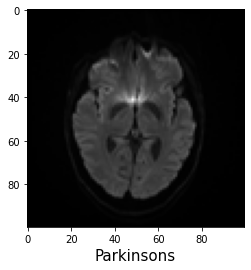

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_049.png


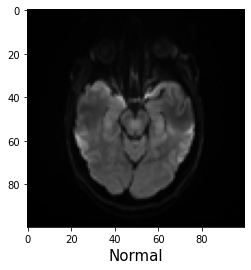

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_052.png


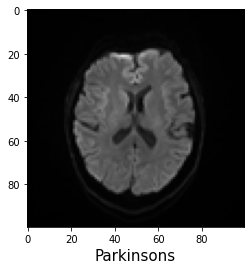

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_013.png


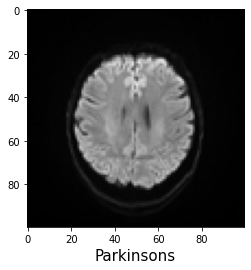

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_018.png


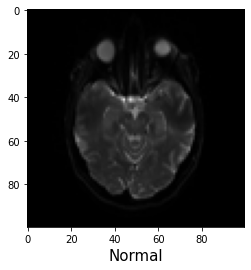

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_051.png


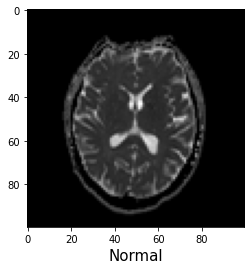

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_029.png


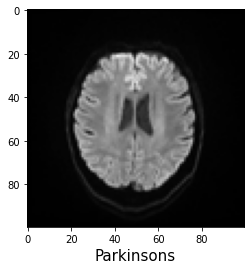

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_016.png


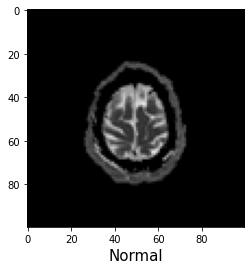

Test/Normal/localizer_001.png


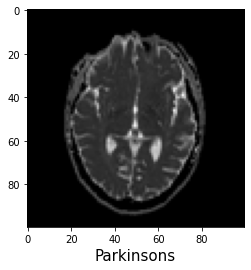

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_001.png


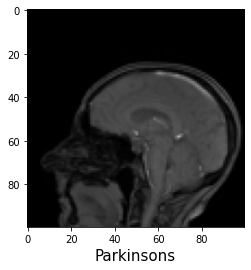

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_036.png


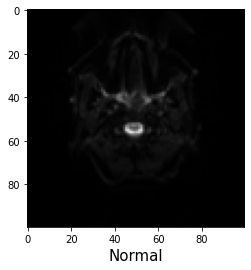

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_020.png


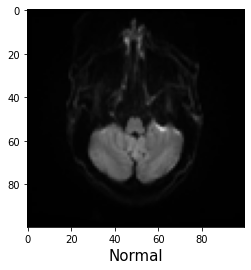

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_002.png


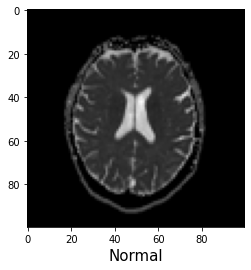

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_001.png


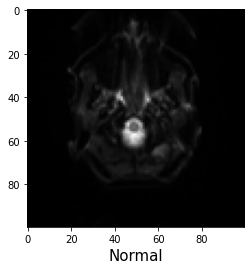

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_032.png


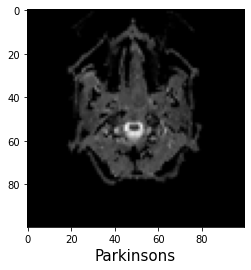

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_009.png


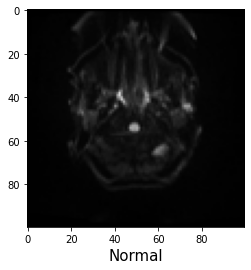

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_045.png


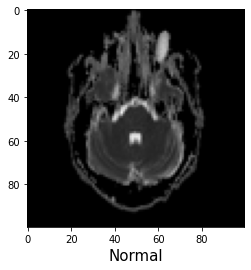

Test/Normal/Mag_Images_005.png


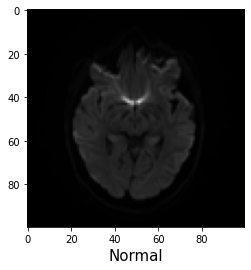

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_022.png


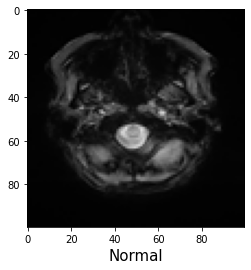

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_015.png


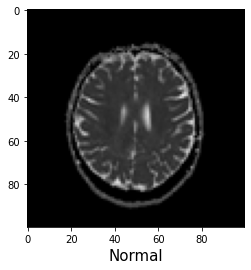

Test/Normal/Mag_Images_025.png


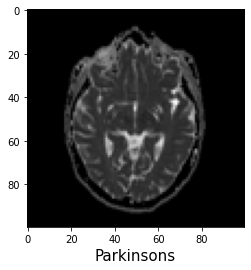

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_011.png


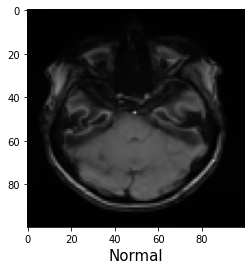

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_028.png


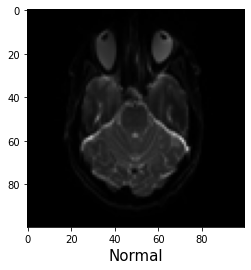

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_019.png


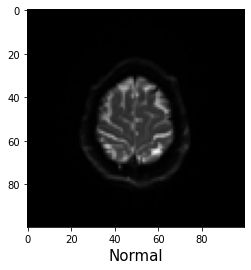

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_019.png


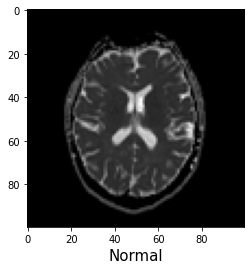

Test/Normal/Mag_Images_008.png


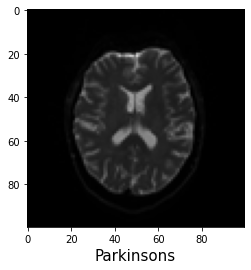

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_026.png


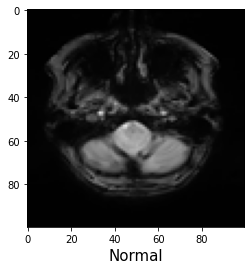

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_012.png


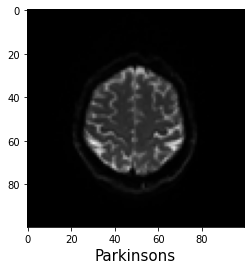

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_024.png


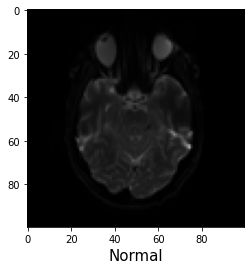

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_035.png


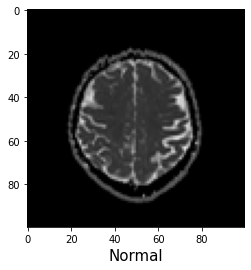

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_056.png


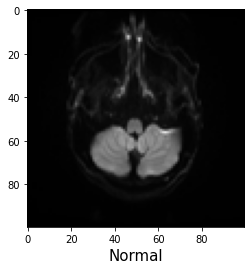

Test/Normal/Mag_Images_004.png


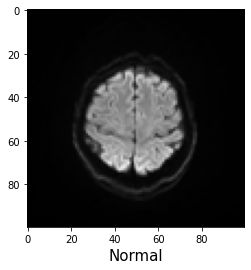

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_025.png


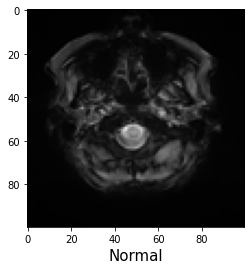

Test/Normal/Mag_Images_006.png


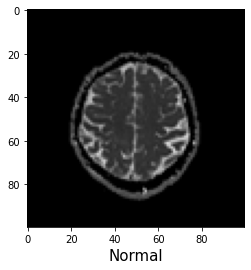

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_023.png


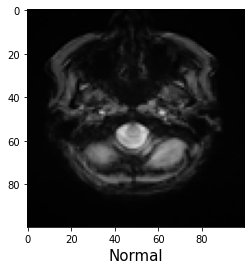

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_024.png


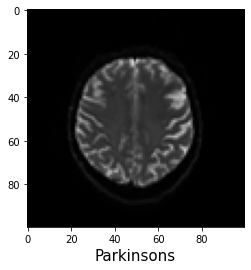

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_025.png


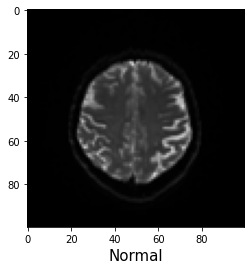

Test/Normal/Mag_Images_024.png


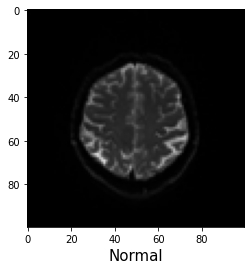

Test/Normal/Mag_Images_019.png


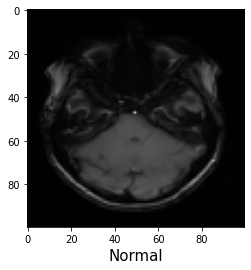

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_013.png


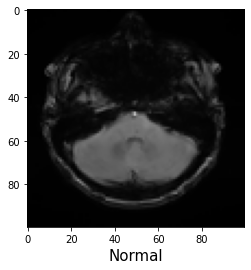

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_010.png


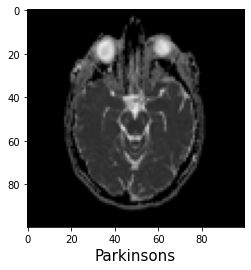

Test/Normal/Mag_Images_003.png


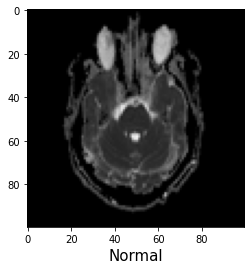

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_039.png


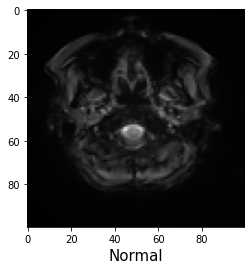

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_015.png


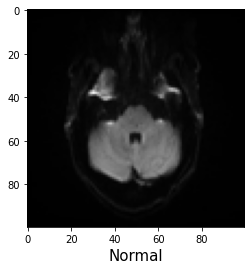

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_053.png


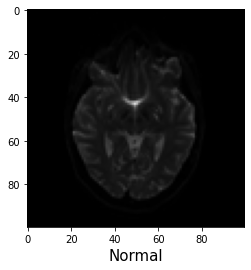

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_023.png


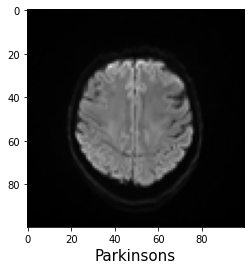

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_017.png


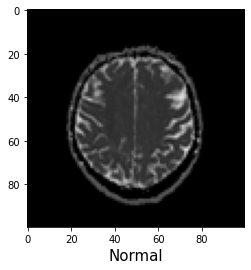

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_014.png


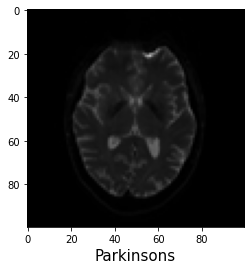

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_042.png


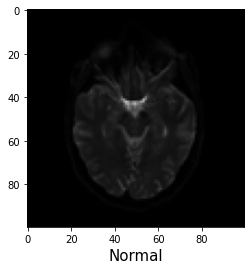

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_037.png


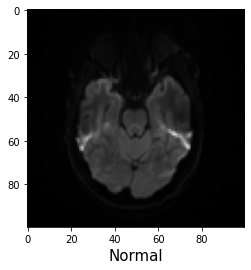

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_054.png


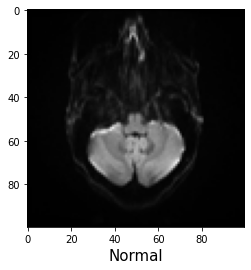

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_022.png


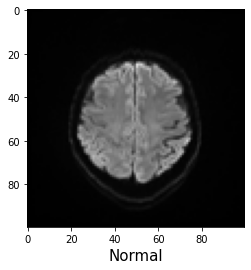

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_033.png


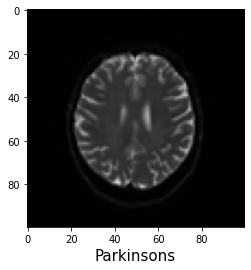

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_002.png


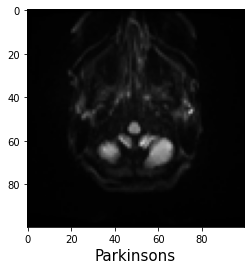

Test/Normal/Mag_Images_023.png


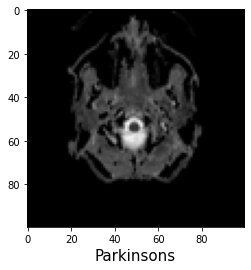

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_059.png


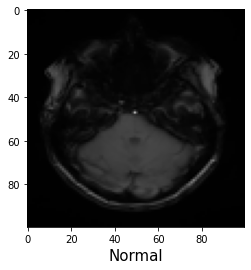

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_003.png


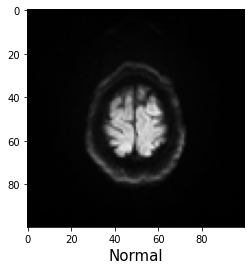

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_050.png


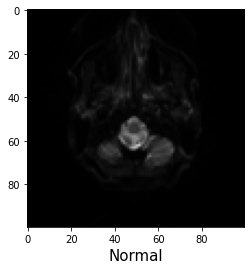

Test/Normal/Mag_Images_013.png


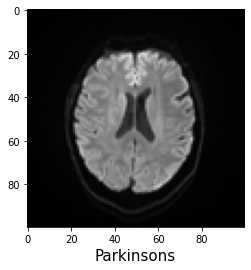

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_020.png


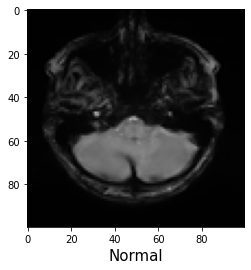

Test/Normal/Mag_Images_029.png


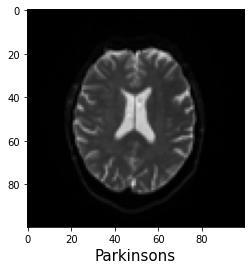

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_060.png


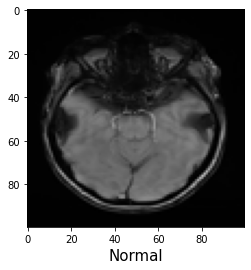

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_044.png


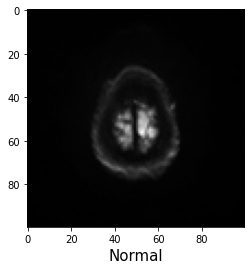

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_028.png


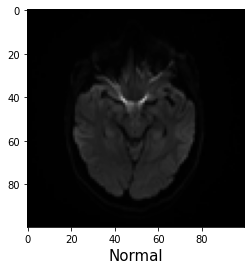

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_026.png


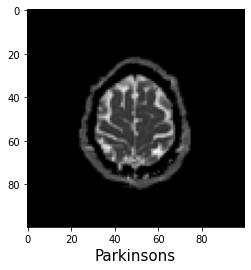

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_031.png


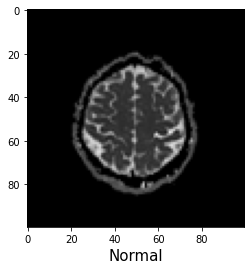

Test/Normal/Mag_Images_001.png


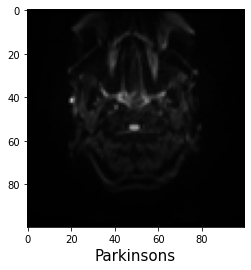

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_008.png


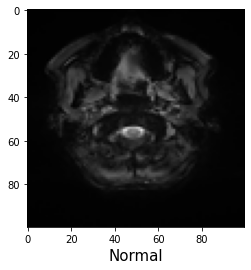

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_029.png


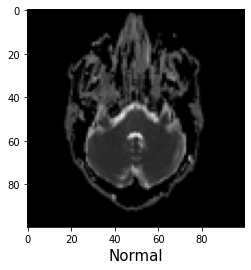

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_005.png


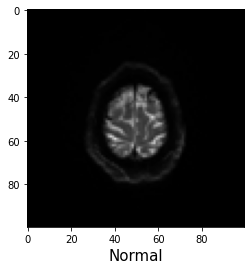

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_057.png


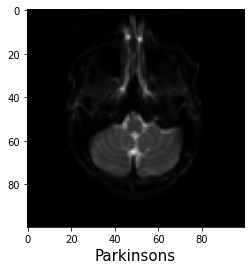

Test/Normal/Mag_Images_018.png


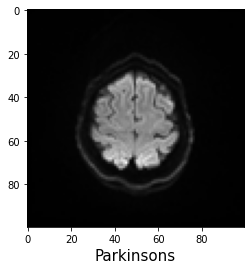

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_011.png


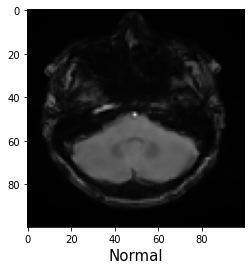

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_048.png


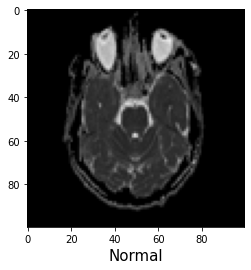

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_030.png


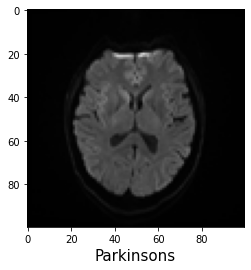

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_008.png


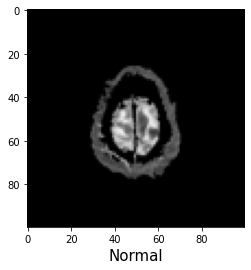

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_034.png


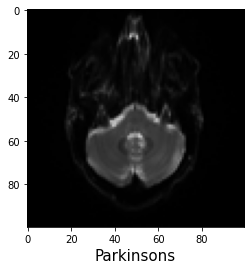

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_010.png


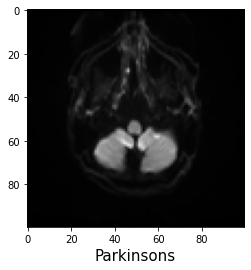

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_058.png


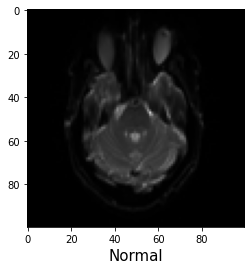

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_018.png


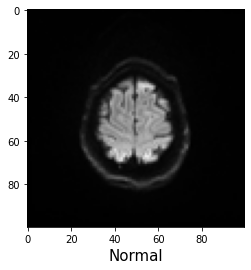

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_040.png


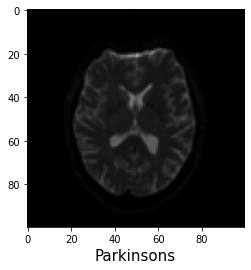

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_021.png


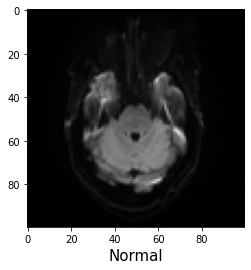

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_027.png


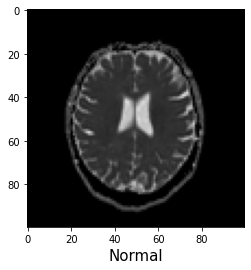

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_012.png


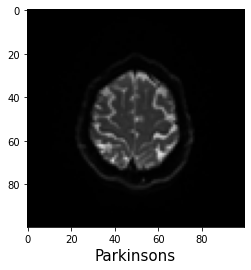

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_003.png


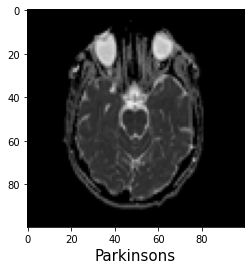

Test/Normal/Mag_Images_009.png


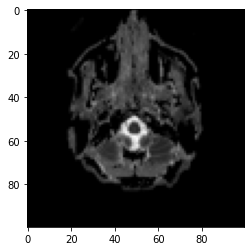

Test/Normal/Mag_Images_011.png


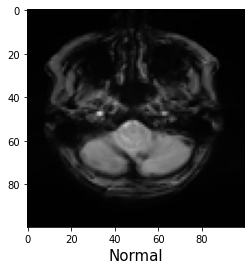

Test/Normal/localizer_002.png


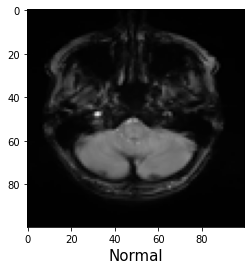

Test/Normal/Mag_Images_027.png


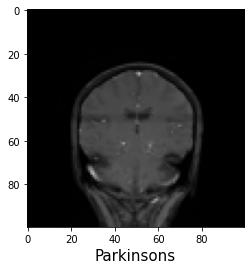

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_041.png


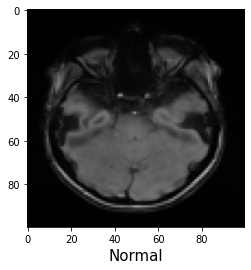

Test/Normal/Mag_Images_021.png


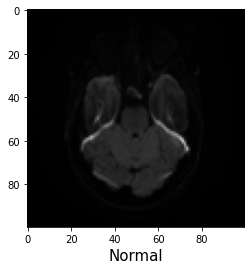

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_055.png


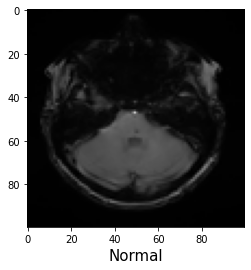

Test/Normal/Mag_Images_026.png


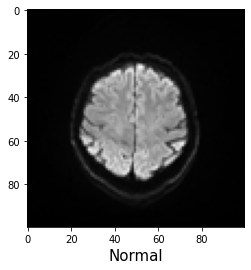

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_007.png


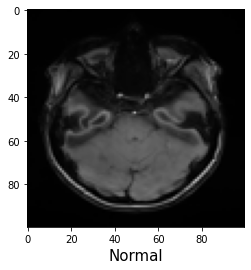

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_005.png


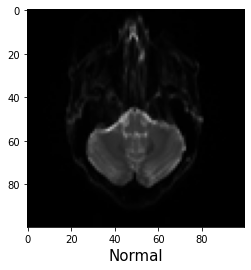

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_004.png


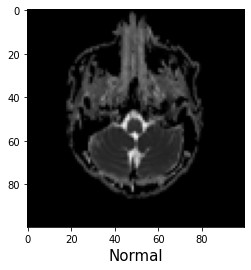

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_038.png


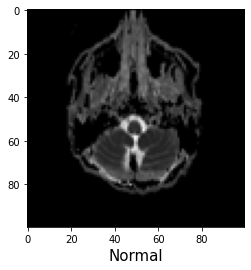

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_047.png


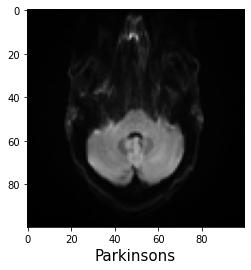

Test/Normal/Mag_Images_014.png


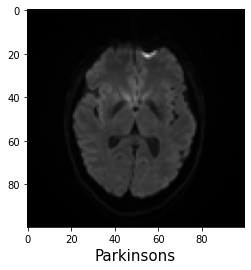

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_017.png


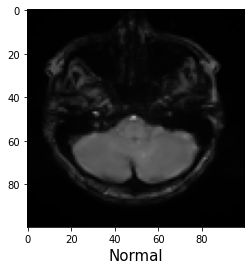

Test/Normal/localizer_003.png


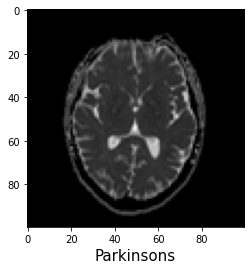

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_009.png


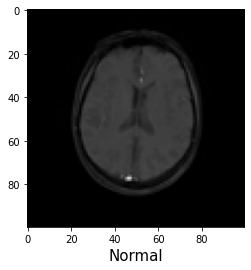

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_004.png


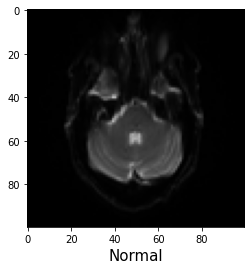

Test/Normal/Mag_Images_010.png


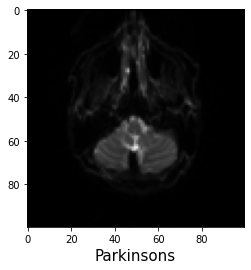

Test/Normal/Mag_Images_012.png


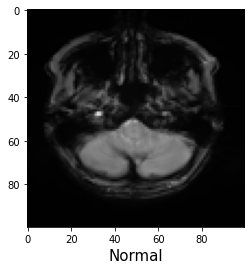

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_006.png


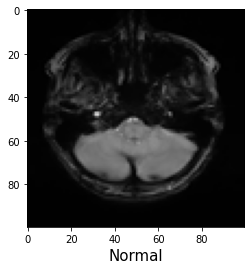

Test/Normal/Mag_Images_020.png


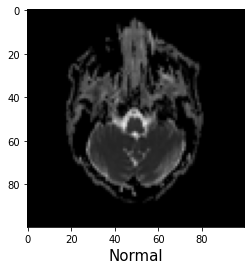

Test/Normal/Mag_Images_022.png


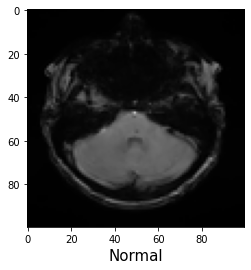

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_014.png


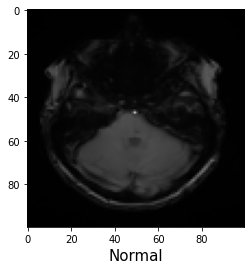

Test/Normal/Mag_Images_016.png


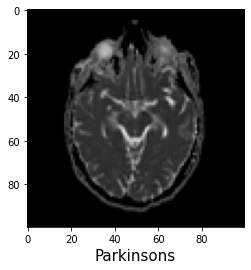

Test/Normal/Mag_Images_017.png


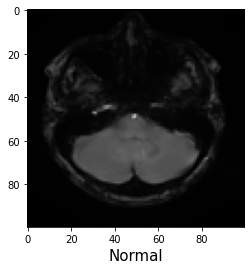

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_007.png


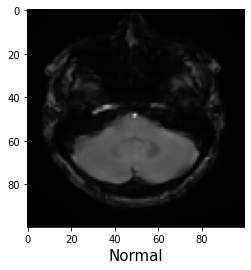

Test/Normal/Mag_Images_002.png


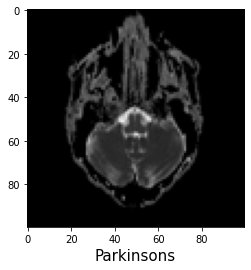

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_016.png


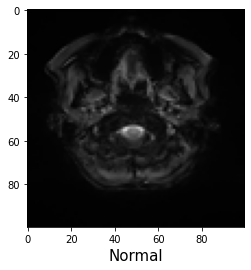

Test/Normal/Mag_Images_028.png


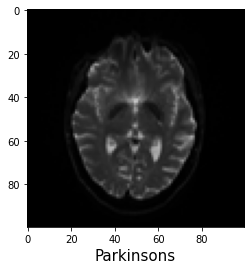

Test/Normal/Mag_Images_015.png


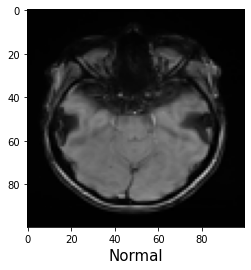

Test/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_027.png


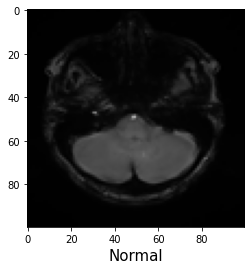

Test/Normal/ep2d_diff_3scan_trace_p2_TRACEW_DFC_021.png


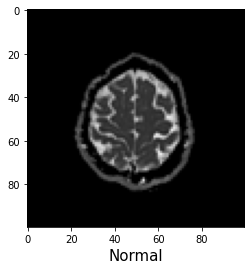

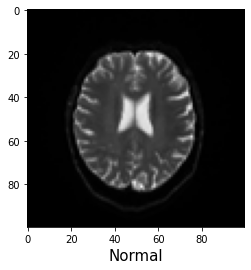

In [48]:
fp, tn = tumor_prediction(make_list_of_imgs('Test/Normal/') )
# make_list_of_imgs('Test/Normal/')

### Testing with MRI images without cerebral carcinoma

Test/Parkinson/DUAL_TSE_001.png
Test/Parkinson/DUAL_TSE_018.png


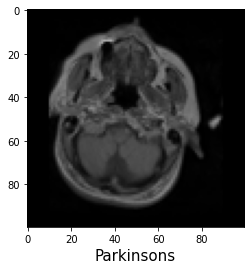

Test/Parkinson/dReg_-_sDW_SSh_SENSE_011.png


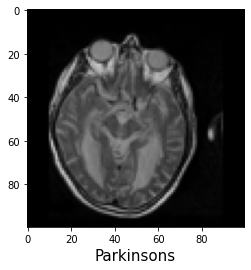

Test/Parkinson/dReg_-_sDW_SSh_SENSE_002.png


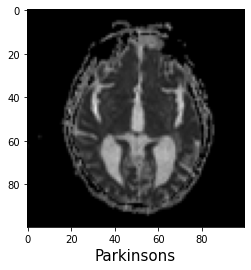

Test/Parkinson/dReg_-_sDW_SSh_SENSE_007.png


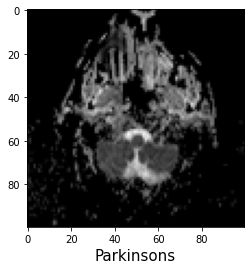

Test/Parkinson/DUAL_TSE_002.png


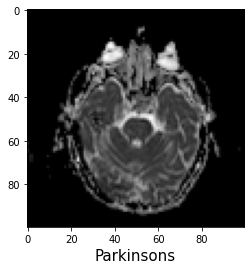

Test/Parkinson/DUAL_TSE_021.png


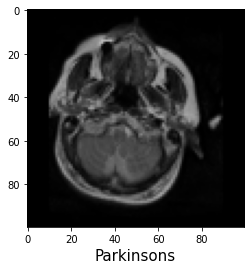

Test/Parkinson/dReg_-_sDW_SSh_SENSE_004.png


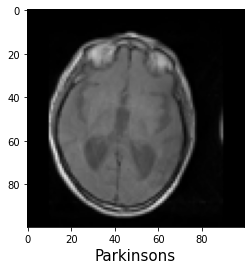

Test/Parkinson/dReg_-_sDW_SSh_SENSE_015.png


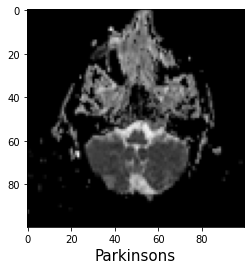

Test/Parkinson/dReg_-_sDW_SSh_SENSE_012.png


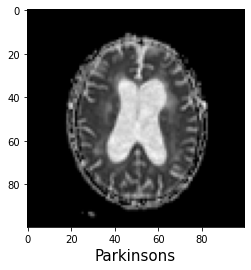

Test/Parkinson/DUAL_TSE_016.png


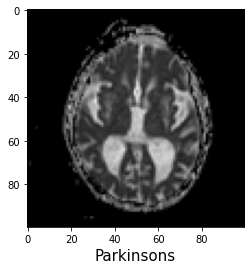

Test/Parkinson/dReg_-_sDW_SSh_SENSE_022.png


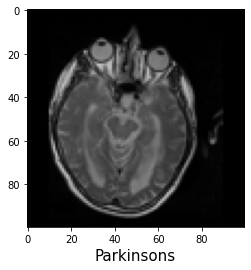

Test/Parkinson/DUAL_TSE_008.png


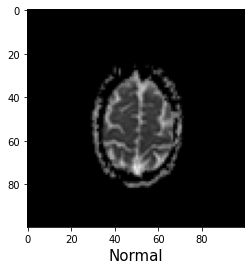

Test/Parkinson/DUAL_TSE_003.png


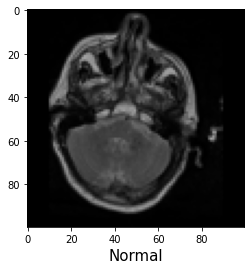

Test/Parkinson/DUAL_TSE_006.png


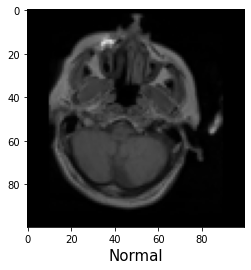

Test/Parkinson/DUAL_TSE_005.png


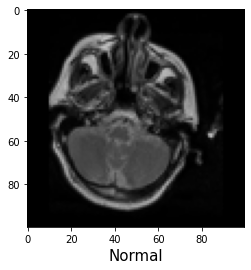

Test/Parkinson/DUAL_TSE_011.png


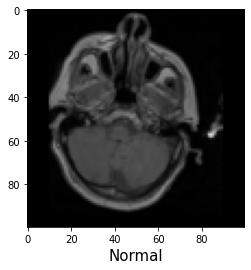

Test/Parkinson/dReg_-_sDW_SSh_SENSE_016.png


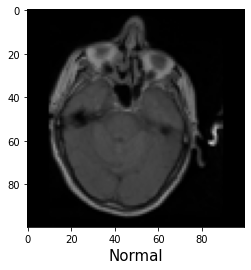

Test/Parkinson/DUAL_TSE_017.png


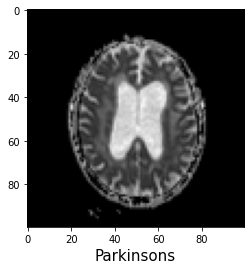

Test/Parkinson/dReg_-_sDW_SSh_SENSE_021.png


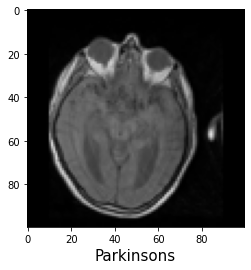

Test/Parkinson/DUAL_TSE_022.png


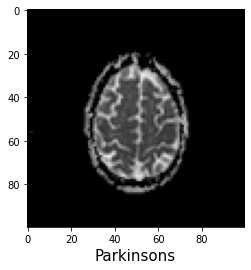

Test/Parkinson/dReg_-_sDW_SSh_SENSE_019.png


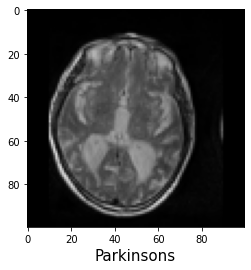

Test/Parkinson/dReg_-_sDW_SSh_SENSE_001.png


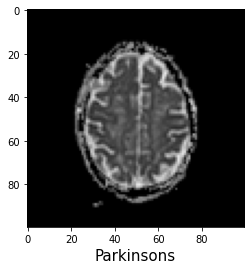

Test/Parkinson/DUAL_TSE_020.png


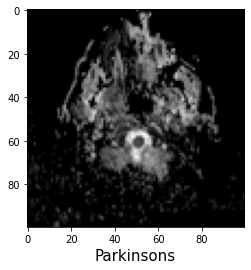

Test/Parkinson/dReg_-_sDW_SSh_SENSE_020.png


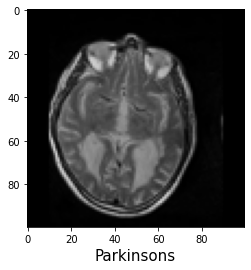

Test/Parkinson/dReg_-_sDW_SSh_SENSE_010.png


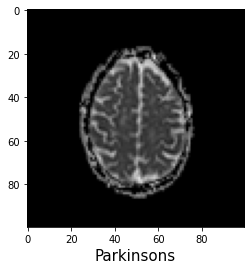

Test/Parkinson/DUAL_TSE_010.png


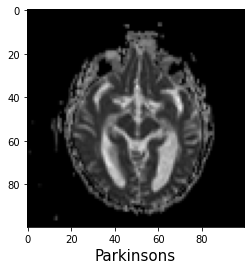

Test/Parkinson/DUAL_TSE_012.png


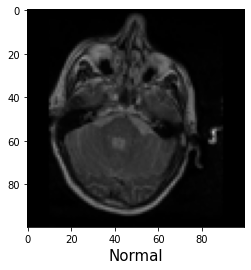

Test/Parkinson/DUAL_TSE_013.png


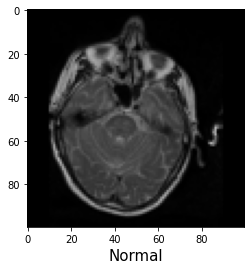

Test/Parkinson/dReg_-_sDW_SSh_SENSE_009.png


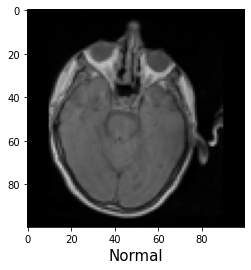

Test/Parkinson/DUAL_TSE_014.png


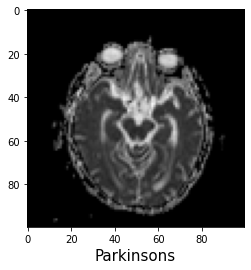

Test/Parkinson/dReg_-_sDW_SSh_SENSE_005.png


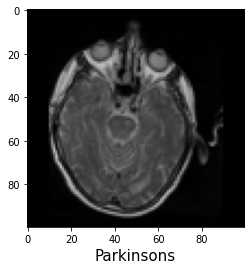

Test/Parkinson/dReg_-_sDW_SSh_SENSE_006.png


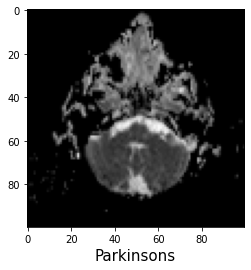

Test/Parkinson/DUAL_TSE_015.png


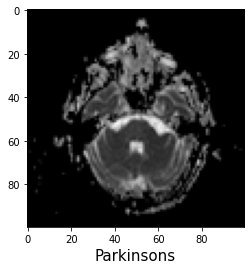

Test/Parkinson/dReg_-_sDW_SSh_SENSE_003.png


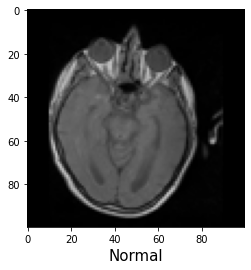

Test/Parkinson/DUAL_TSE_009.png


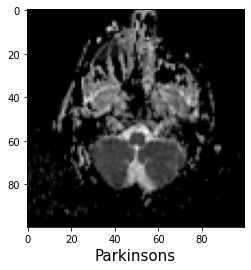

Test/Parkinson/dReg_-_sDW_SSh_SENSE_018.png


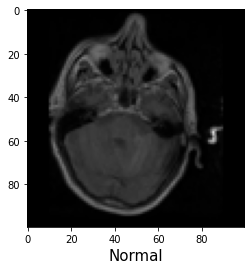

Test/Parkinson/dReg_-_sDW_SSh_SENSE_013.png


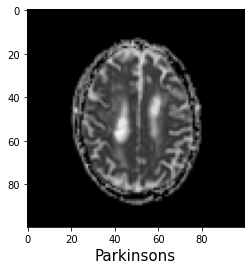

Test/Parkinson/dReg_-_sDW_SSh_SENSE_017.png


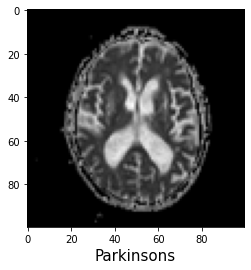

Test/Parkinson/DUAL_TSE_004.png


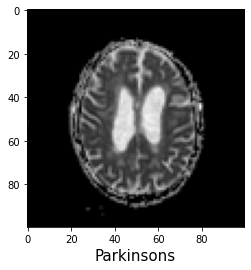

Test/Parkinson/DUAL_TSE_007.png


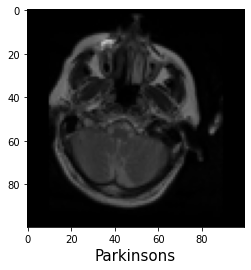

Test/Parkinson/dReg_-_sDW_SSh_SENSE_014.png


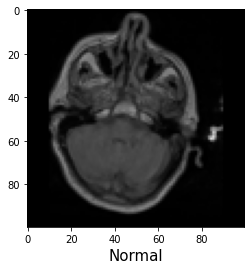

Test/Parkinson/dReg_-_sDW_SSh_SENSE_008.png


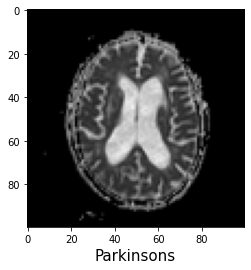

Test/Parkinson/DUAL_TSE_019.png


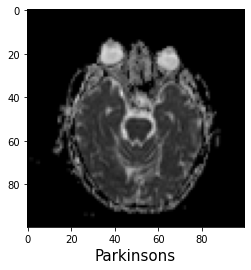

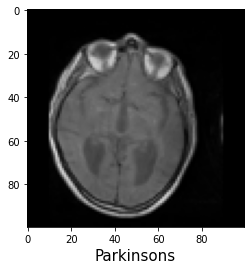

In [45]:
tp, fn = tumor_prediction(make_list_of_imgs('Test/Parkinson/') )#classified

Out of the 10 test images, 9 were classified correctly

In [46]:
def accuracy_cnn(tp, tn, fp, fn):
    return (tp + tn)/(tp + tn + fp + fn)

In [49]:
accuracy_cnn(tp, tn, fp, fn)

0.703030303030303